In [1]:
# 평균이 4 표준편차가 0.8인 모집단으로부터 10000개의 표본을 추출하여 저장하고 그중 10개를 출력하세요.

from scipy.stats import norm
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
pop = norm(loc=4,scale = 0.8)
pyobon = pop.rvs(size=10000, random_state=0)

print(pyobon[:10])

[5.41124188 4.32012577 4.78299039 5.79271456 5.49404639 3.2181777
 4.76007073 3.87891423 3.91742492 4.3284788 ]


평균 3.9852530238733874
표준편차 0.7900452545408967
-0.0 1.0


<AxesSubplot:ylabel='Count'>

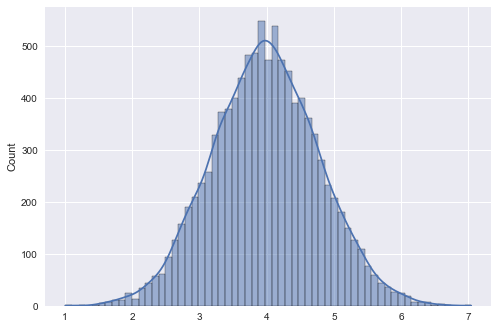

In [3]:
# 위 과제에서 10000개의 표본의 평균 및 표준편차를 구하고 시각화하여 정규분포를 따르는지 확인하세요
m = np.mean(pyobon)
print('평균',m)
sig = np.std(pyobon)
print('표준편차',sig)
sns.histplot(pyobon,kde=True)
#norm_pyobon = (pyobon-m)/sig
#print(norm_pyobon.mean().round(4),norm_pyobon.std().round(4))


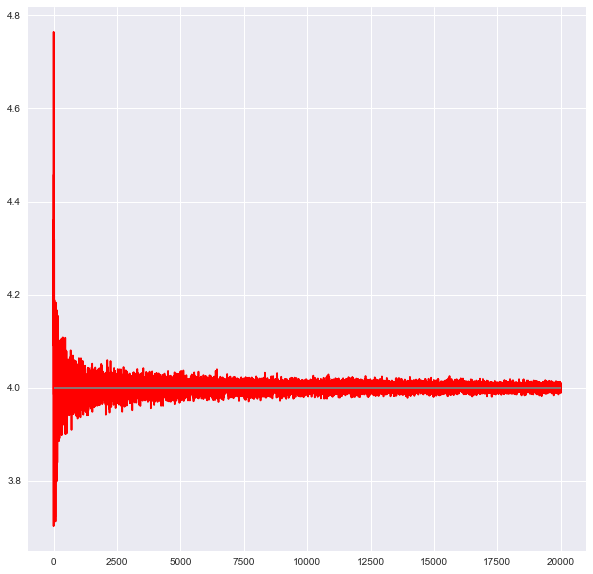

In [8]:
# 샘플 사이즈를 순차적으로 늘렸을 때 표본 평균이 모평균에 가까워짐을 시각화여 입증하세요
size = np.arange(1,20001)
means = []
for i,num in enumerate(size):
    pyobon = pop.rvs(size=num)
    means.append(pyobon.mean())

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.plot(size,means,color='red')
ax.hlines(4,0,max(size), colors='gray')

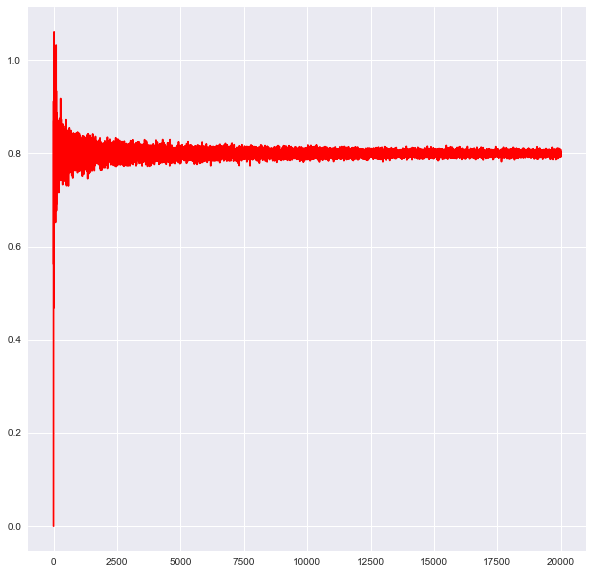

In [10]:
# 샘플 사이즈가 커질 수록 표본 평균의 표준편차가 작아짐을 시각화하여 입증하세요(y축이 표본평균의 표준편차)
size = np.arange(1,20001)
stds = []
for i,num in enumerate(size):
    pyobon = pop.rvs(size=num)
    stds.append(pyobon.std())

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.plot(size,stds,color='red')
#ax.hlines(4,0,max(size), colors='gray')

Text(0, 0.5, 'sample std')

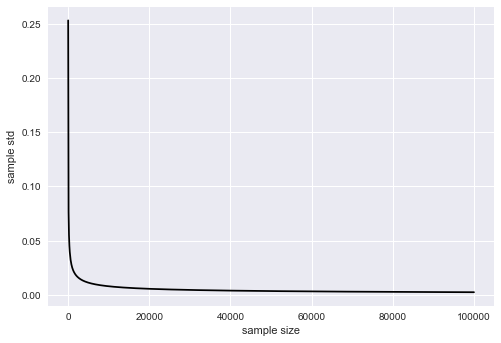

In [2]:
import numpy as np
from scipy import stats

size_array  = np.arange(10,100100, 100)
len(size_array)
population = stats.norm(loc=4,scale=0.8)
population.rvs(size=10)
# 샘플사이즈를 변화시키면서 표본평균을 도출하는 시뮬레이션
np.random.seed(1)
sample_mean_array_size = np.zeros(len(size_array))
aaa = np.zeros(len(size_array))
for i in range(0,len(size_array)):
    sample = population.rvs(size=size_array[i])
    sample_mean_array_size[i] = np.mean(sample)
    aaa[i]= population.std() / (len(sample)**0.5)
sample_mean_array_size[:10]

# 샘플사이즈가 커질수록 표본평균이 모평균에 가까워짐
import matplotlib.pyplot as plt
plt.plot(size_array, aaa, color='black')
plt.xlabel('sample size')
plt.ylabel('sample std')


In [ ]:
# [과제] 샘플사이즈가 커질수록 표본평균의 흩어지는 정도가 작아져서 모평균에 가깝게 모이는 현상을 바이올인 플롯으로 시각화하여 출력하세요

In [7]:
import seaborn as sns
size = np.arange(1,100001)
means = []
for i,num in enumerate(size):
    pyobon = pop.rvs(size=num)
    means.append(pyobon.mean())

sns.violinplot(means,color='skyblue')

KeyboardInterrupt: 

<AxesSubplot:>

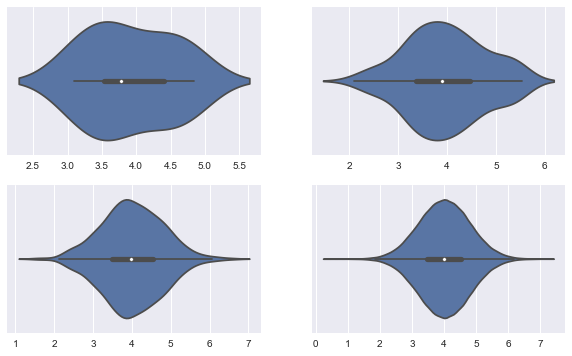

In [4]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

population = norm(loc=4,scale=0.8)
sample_size1 = population.rvs(size=10)
sample_size2 = population.rvs(size=100)
sample_size3 = population.rvs(size=1000)
sample_size4 = population.rvs(size=100000)




import matplotlib.pyplot as plt
import seaborn as sns


fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(221)
sns.violinplot(sample_size1)
ax2 = fig.add_subplot(222)
sns.violinplot(sample_size2)
ax3 = fig.add_subplot(223)
sns.violinplot(sample_size3)
ax4 = fig.add_subplot(224)
sns.violinplot(sample_size4)


<AxesSubplot:xlabel='size', ylabel='mean'>

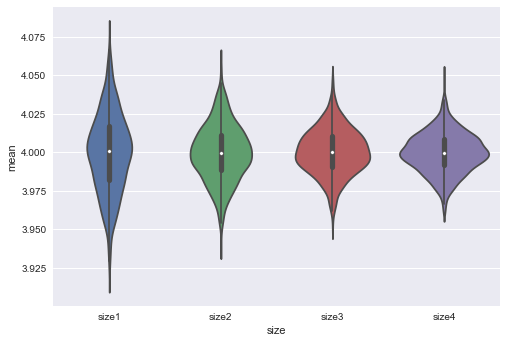

In [8]:
def meaning(a):
    lst=[]
    for i in range(1000):
        lst.append(pop.rvs(a).mean())
    return lst

arr1 =pd.DataFrame(meaning(1000))
arr1['size']='size1'
arr2=pd.DataFrame(meaning(2000))
arr2['size']='size2'
arr3=pd.DataFrame(meaning(3000))
arr3['size']='size3'
arr4=pd.DataFrame(meaning(4000))
arr4['size']='size4'
df=pd.concat([arr1,arr2,arr3,arr4])
df.columns = ['mean', 'size']
sns.violinplot(x='size',y='mean',data=df)
